## Типы данных и конструирование признаков

На данный момент мы проанализируем данные adalt.data, для выявления признаков и подсчётов разных статистик. К примеру: какая зп? Кто больше зарабатывает от определенной суммы денег, Имеет ли работник образование и тд.

In [158]:
import pandas as pd
from IPython.display import display
import numpy as np
import mglearn
import matplotlib.pyplot as plt

#import scikit-learn library extensions
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVR
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE

In [2]:
# файл не содержит заголовков столбцов, поэтому мы передаем header=None
# и записываем имена столбцов прямо в "names"
data = pd.read_csv("G:/Pproject/ml-intro/data/adult.data", header=None, index_col=False, 
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                         'mariral-status', 'occupation', 'relationship', 'race',
                         'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
                         'native-country', 'income'])
# в целях упрощения мы выберим лишь некоторые столбцы
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
# проверяем правильность заполнения пола, с помощью количества.
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


В библиотеки <span style="color:#42c5f4">pandas</span> имеется очень просто способ кодирвание данных с помощью функции <span style="color:#42c5f4">get_dummies()</span>

In [4]:
print("Исходные признаки: \n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Признаки после get_dummies: \n", list(data_dummies.columns))

Исходные признаки: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Признаки после get_dummies: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
# берем только те столбцы, которые содержат признаки,
# т.е. все столбцы, начиная с "age" и заканчивая "occupation_ Transport-moving"
# этот диапазон содержит все признаки, кроме целевой переменной
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# извлекаем массивы numpy
X = features.values
y = data_dummies['income_ >50K'].values

print("форма массива X: {} форма массива y: {}".format(X.shape, y.shape))

форма массива X: (32561, 44) форма массива y: (32561,)


Теперь данные представлены в том формате, который компоненты библиотеки scikit-learn умеют обрабатывать, а значит построение модели можно продложить в обычном режиме

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
logreg.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(logreg.score(X_test, y_test)))

Правильность на тестовом наборе: 0.81


Функция get_dummies в pandas обрабатывает все числа как непрерывные значения и не будет создавать дамми-переменные для них. Описание проблемы ниже.

In [8]:
# создаём дата-фрейм с признаком, который принимает 
# целочисленные значения, и категориальным признаком, значения которого являются строками
demo_df = pd.DataFrame({'Целочисленный признак': [0,1,2,1],
                        'Категориальный признак': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Целочисленный признак,Категориальный признак
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [9]:
# Функция get_dummies закодирует лишь строковые признак,
# тогда как целочисленный признак оставит без изменений
pd.get_dummies(demo_df)

,Целочисленный признак,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


Если создать дамми-переменные и для столбца *Целочисленный признак*, то можно явно указать столбцы, которые нужно закодировать, с помощью параметра columns. И тогда оба признака будут обработаны как категориальные переменные.

In [10]:
demo_df['Целочисленный признак'] = demo_df['Целочисленный признак'].astype(str)
pd.get_dummies(demo_df, columns=['Целочисленный признак', 'Категориальный признак'])

,Целочисленный признак_0,Целочисленный признак_1,Целочисленный признак_2,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### Биннинг, дискретизация, линейные модели и деревья

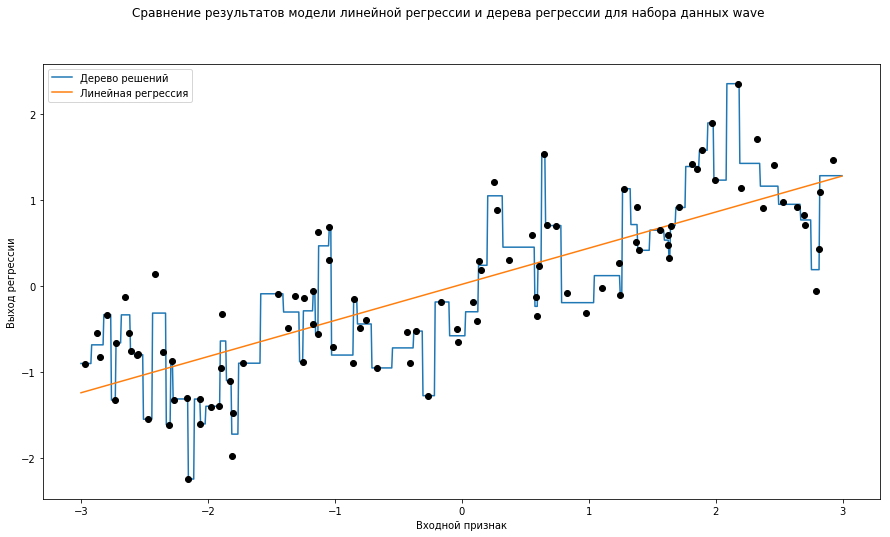

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

plt.figure(figsize=(15,8))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Дерево решений")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Линейная регрессия")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc="best")
plt.suptitle("Сравнение результатов модели линейной регрессии и дерева регрессии для набора данных wave")
plt.show()

Для повышения прогнозной силы линейных моделей при работе с непрерывными данными является <span style="color: #6b42f4">*бинниг*</span> (*bining*) характеристик, также известный как <span style="color: #6b42f4">*дискретизация*</span>, который разбивает исходный признак на несколько категорий.

In [12]:
# зададим 10 категорий, равномерно распределенных между значениями -3 и 3.
bins = np.linspace(-3, 3, 11)
print("Категорий : {}".format(bins))

Категорий : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [13]:
# записываем для каждой точки данных категорию,в которую он попадает.
which_bin = np.digitize(X, bins=bins)
print("\n Точки данных:\n", X[:5])
print("\n Категории для точек данных: \n", which_bin[:5])


 Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 Категории для точек данных: 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [14]:
# выполним прямое кодирование этого дискретного признака с помощью функции OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories="auto")
# encoder.fit находит уникальные значения, имеющиеся в which_bin
encoder.fit(which_bin)
# transform осуществляет прямое кодирование
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


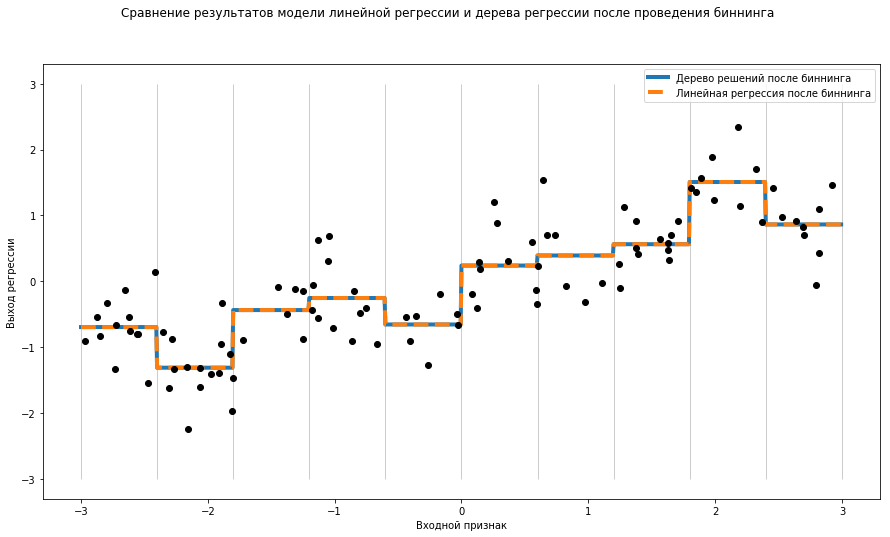

In [15]:
# построим новую модель линейной регрессии и дерева решений на основе данных, 
# приобразованных с помощью прямого кодирования.
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.figure(figsize=(15,8))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Дерево решений после биннинга", linewidth=4)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Линейная регрессия после биннинга", linestyle='dashed', linewidth=4)

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc="best")
plt.suptitle("Сравнение результатов модели линейной регрессии и дерева регрессии после проведения биннинга")
plt.show()

### Взаимодействия и полиномы

In [20]:
X_combined = np.hstack([ X, X_binned])
print(X_combined.shape)

(100, 11)


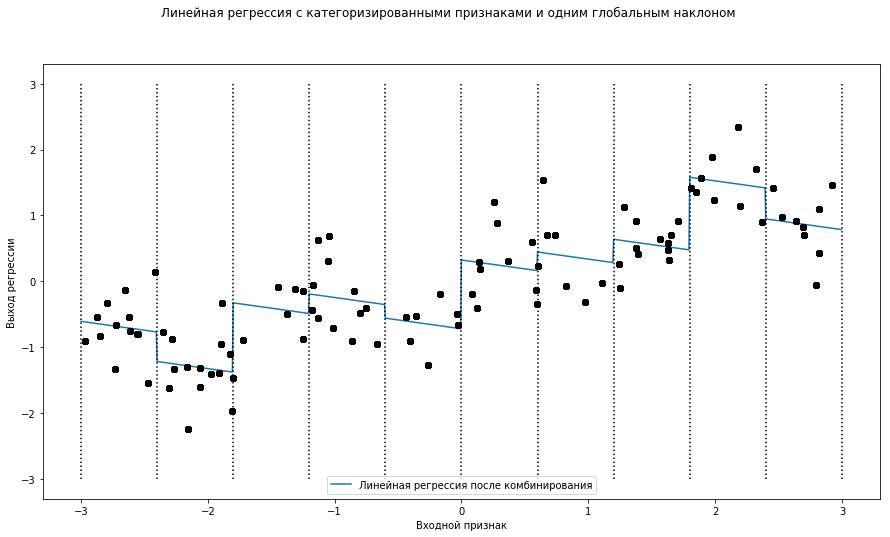

In [25]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.figure(figsize=(15,8))
plt.plot(line, reg.predict(line_combined), label='Линейная регрессия после комбинирования')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.legend(loc='best')
    plt.ylabel('Выход регрессии')
    plt.xlabel('Входной признак')
    plt.suptitle("Линейная регрессия с категоризированными признаками и одним глобальным наклоном")
    plt.plot(X[:, 0], y, 'o', c='k')

In [26]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


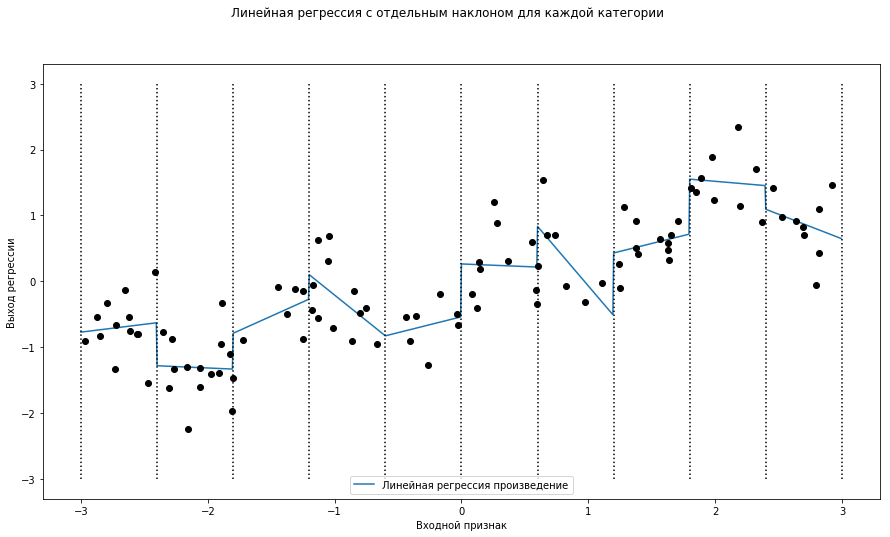

In [38]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.figure(figsize=(15,8))
plt.plot(line, reg.predict(line_product), label='Линейная регрессия произведение')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='lower center')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.suptitle("Линейная регрессия с отдельным наклоном для каждой категории")
plt.show()

In [40]:
# использование полиноминала
# задаём степень полинома 10: значение по умолчанию "include_bias=True" добавляет
# признак-константу 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

# Использование в преобразование полиномов до 10-й степени даёт 10 новых признаков
X_poly.shape

(100, 10)

In [41]:
# Сравним элементы массива X_poly с X
print("Элементы массива X:\n{}".format(X[:5]))
print("Элементы массива X_poly:\n{}".format(X_poly[:5]))

Элементы массива X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Элементы массива X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [42]:
print("Имена полиномиальных признаков:\n{}".format(poly.get_feature_names()))

Имена полиномиальных признаков:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


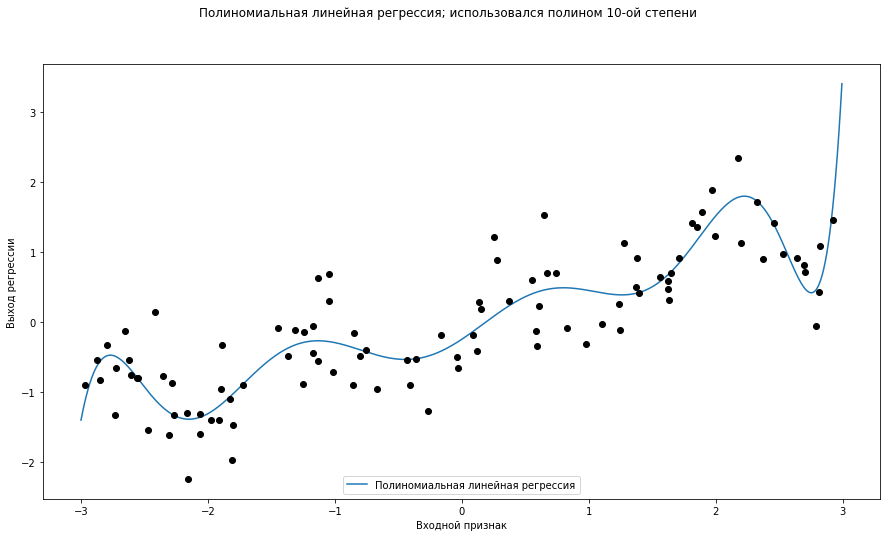

In [46]:
# использование полиномиальных признаков в модели линейной регрессии даёт 
# классическую модель полиномиальноый регрессии
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.figure(figsize=(15,8))
plt.plot(line, reg.predict(line_poly), label='Полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc='lower center')
plt.suptitle("Полиномиальная линейная регрессия; использовался полином 10-ой степени")
plt.show()

На одномерном наборе данных полиномиальные признаки дают очень сглаженную подгонку. Однако полиномы высокой степени, как правило, резко меняют направление  на границах области определения или в менее плотных областях данных.
Ниже приводится пример модель ядерного SVM, обученная а исходных данных без каких-либо преобразований.

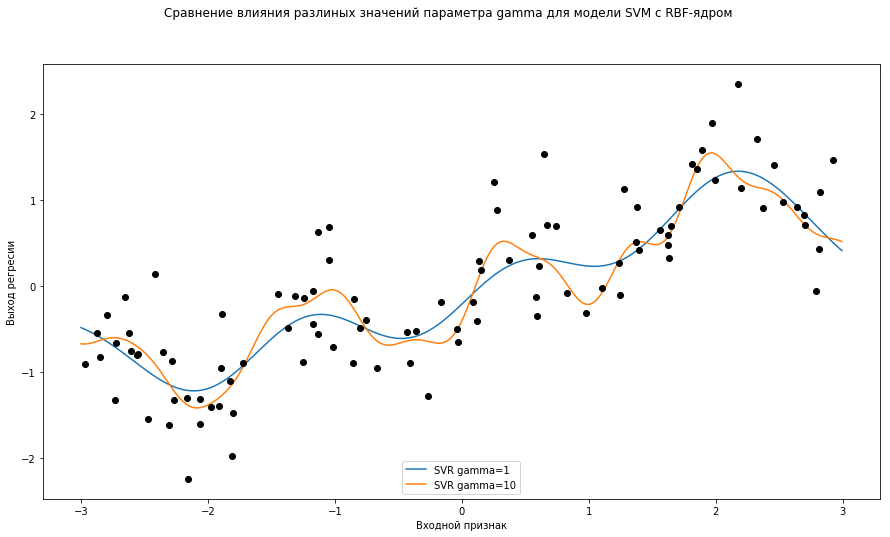

In [50]:
plt.figure(figsize=(15,8))
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Выход регресии')
plt.xlabel("Входной признак")
plt.legend(loc="lower center")
plt.suptitle("Сравнение влияния разлиных значений параметра gamma для модели SVM c RBF-ядром")
plt.show()

In [61]:
# реальный пример на load_boston данных
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [72]:
# масштабируем данные 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("Форма обучающего массива X: {}".format(X_train.shape))
print("Форма обучающего массива Х полиномы и взаим: {}".format(X_train_poly.shape))

Форма обучающего массива X: (379, 13)
Форма обучающего массива Х полиномы и взаим: (379, 105)


In [77]:
print("Имена полиномальных признаков: \n{}".format(poly.get_feature_names()))

Имена полиномальных признаков: 
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [79]:
# Вычеслим правильность прогнозов, применив модель Ridge (гребневая регрессия)
# к данным, включающим взаимодействия, и без взаимодействия
ridge = Ridge().fit(X_train_scaled, y_train)
print("Правильность на тестовом наборе без взаимодействия: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Правильность на тестовом наборе с взаимодействиями: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействия: 0.621
Правильность на тестовом наборе с взаимодействиями: 0.753


In [84]:
# Вычеслим правильность прогнозов, применив модель ensemble (случайные леса)
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Правильность на тестовом наборе без взаимодействия: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Правильность на тестовом наборе с взаимодействиями: {:.3f}".format(rf.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействия: 0.805
Правильность на тестовом наборе с взаимодействиями: 0.766


### Одномерные нелинейные преобразования

In [99]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
bins = np.bincount(X[:, 0])

print("Частоты значений: \n {}".format(bins))
print()
print(np.unique(X))

Частоты значений: 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  73  75  76  77  78  80  81  82  84  85  87  88  90  91  93  94  95  96
  97  98 101 102 104 106 107 108 109 111 112 114 120 125 127 132 133 139
 140 143 147 175 215 248]


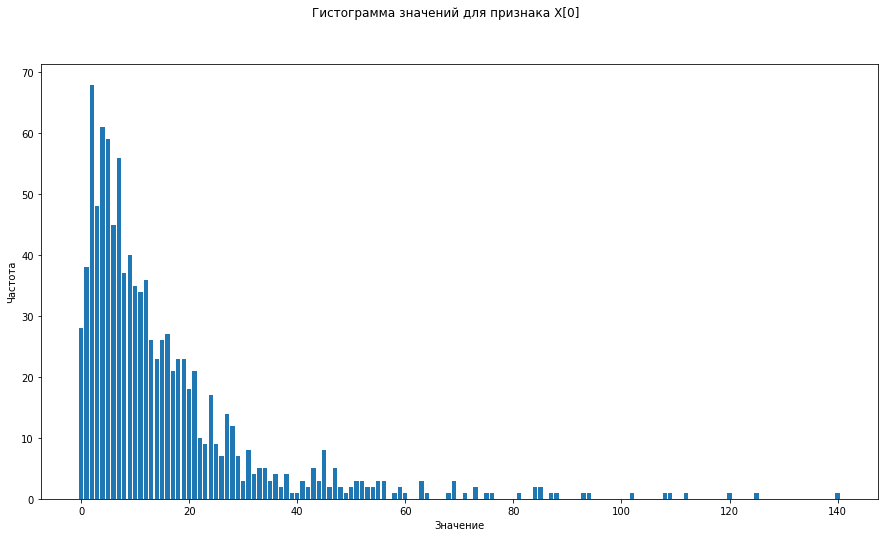

In [101]:
plt.figure(figsize=(15,8))
plt.bar(range(len(bins)), bins)
plt.ylabel("Частота")
plt.xlabel("Значение")
plt.suptitle("Гистограмма значений для признака X[0]")
plt.show()

In [103]:
# полученное распределение значений является очень распространенным явлением в реальной практике
# однако для большиства линейных моделей оно может представлять трудность
# подгоним гребневую регрессию
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.622


Видно, что из-за относительно низкого значение <span style="color: #6b42f4">${R^2}$</span> гребневая регрессия не может должным образом смоделировать взаимосвязь между X & y. Врочем, применение логарифмического преобразования может помочь. Поскольку в данных появится значение 0 (логарифм 0 не определен), мы не можем просто взять и применить к данным функцию <span style="color: #6b42f4">log</span>, вместо этого мы должны вычислить функцию <span style="color: #6b42f4">log(X + 1).</span>

In [104]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

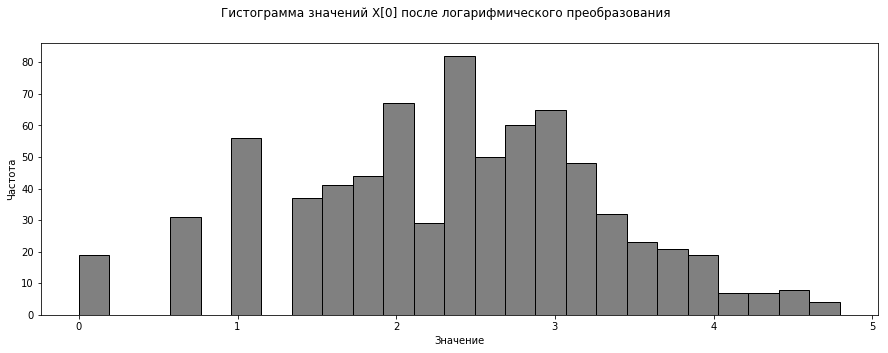

In [115]:
# после преобразования распределения данных стало менее асимметричным и уже 
# не содержит очень больших выбросов, гистограмма ниже проиллюстрирует
plt.figure(figsize=(15,5))
plt.hist(X_train_log[:, 0], bins=25, edgecolor='black', color='gray')
plt.ylabel('Частота')
plt.xlabel('Значение')
plt.suptitle('Гистограмма значений X[0] после логарифмического преобразования')
plt.show()

In [117]:
# Построение модели гребневой регрессии на новых данных даёт
# гораздо более высокое качество подгонки
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.875


## Автоматический отбор признаков

<h3 style="color:green">Одномерные статистики (univariate statistics)</h3>

в книге посмотри на страницу 299, там подробно описано это

In [121]:
cancer = load_breast_cancer()

# задаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# добавляем к данным шумовые признаки первые 30 признаков являются исходыми,
# а остальные 50 являются шумовые
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# используем f_classif (по умолчанию)
# и SelectPercеntile, чтобы выбрать 50% признаков
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива X_train_selected: {}".format(X_train_selected.shape))

Форма массива X_train: (284, 80)
Форма массива X_train_selected: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


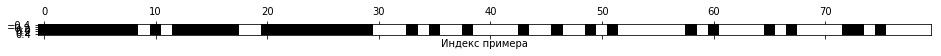

In [128]:
# выяним какие признаки были выбраны с помощью метода get_support
mask = select.get_support()
print(mask)
# визуализируем булевы занчения: черный - True, белый - False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")
plt.show()

In [133]:
# опробуем логистическую регрессию
# преобразуем тестовые данные
X_test_selected = select.transform(X_test)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print("Правильность со всеми признаками: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Правильность только с отобранными признаками: {:.3f}".format(lr.score(X_test_selected, y_test)))

Правильность со всеми признаками: 0.930
Правильность только с отобранными признаками: 0.940


<h3 style="color:green">Отбор признаков на основе модели (model-based selection)</h3>

в книге посмотри на страницу 302, там подробно описано это

In [150]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

Класс SelectFromModel отбирает все признаки, показатель важности которых превышает установленое пороговое значение. Чтобы вычеслить результат, сопоставимый с тем, который мы получили при однофакторном отборе признаков, мы использовали в качестве порогового значения медиану,поэтому будет отобрана половина признаков. В данном случае используется случайный лес на основе деревьев классификации (100 деревьев), чтобы вычеслить важности признаков.

In [151]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("Формат обучающего набора X: {}".format(X_train.shape))
print("Формат обучающего набора X c l1: {}".format(X_train_l1.shape))

Формат обучающего набора X: (284, 80)
Формат обучающего набора X c l1: (284, 40)


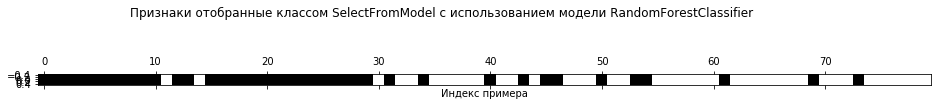

In [154]:
mask = select.get_support()
# визуализируем булевы занчения
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")
plt.suptitle("Признаки отобранные классом SelectFromModel с использованием модели RandomForestClassifier")
plt.show()

In [156]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver='liblinear').fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.951


<h3 style="color:green">Итеративный отбор признаков (iterative selection)</h3>

в книге посмотри на страницу 304, там подробно описано это

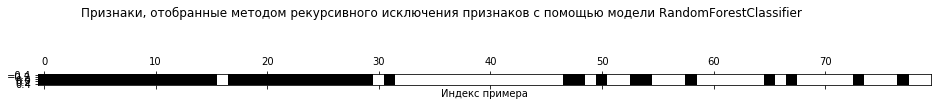

In [160]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
# визуализируем отобранные признаки
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Индекс примера')
plt.suptitle("Признаки, отобранные методом рекурсивного исключения признаков с помощью модели RandomForestClassifier")
plt.show()

In [162]:
# проверка модели на логистической регрессии
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(solver='liblinear').fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Правильность на тестовом наборе : {:.3f}".format(score))

Правильность на тестовом наборе : 0.951


In [163]:
# кроме этого, мы можем применить модель, использованную внутри RFE,
# чтобы вычислить прогнозы. Она использует набор отобранных признаков
print("Правильность на тестовом наборе: {:.3f}".format(select.score(X_test, y_test)))

Правильность на тестовом наборе: 0.951


## Применение экспертных знаний

In [167]:
# применим на практике знания полученные ранее
# возьмём датасет аренда велосипедов в Нью-Йорке citibike.csv
def load_citibike():
    data_mine = pd.read_csv("G:/Pproject/ml-intro/data/citibike.csv")
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one
citibike = load_citibike()

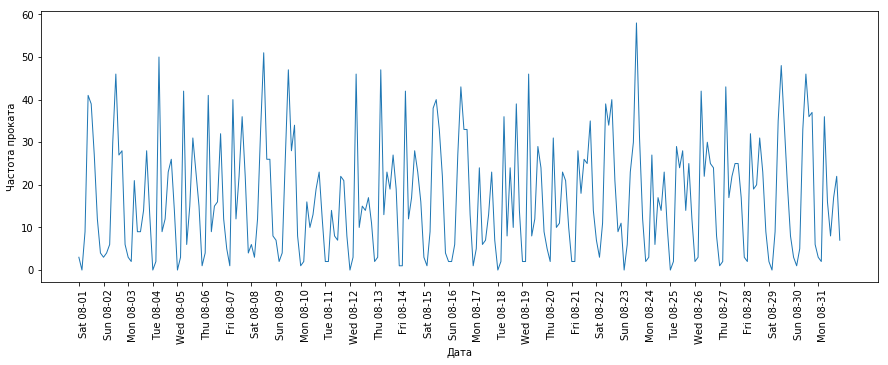

In [169]:
plt.figure(figsize=(15,5))
xticks = pd.date_range(start=citibike.index.min(),
                       end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel('Дата')
plt.ylabel('Частота проката')
plt.show()

In [207]:
# извлекаем значения зависимой переменной (количество велосипедов взятых на прокат)
y = citibike.values
# преобразуем время в формат POSIX с помощью %s
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [247]:
# используем первые 184 точки данных для обучения, а остальные для тестирования
n_train = 184

# функция, которая строит модель на данном наборе признаков и визуализирует её
def eval_on_features(features, target, regressor, txt):
    # разбиваем массив признаков на обучающую и тестовую выборки
    X_train, X_test = features[:n_train], features[n_train:]
    # также разбиваем массив с зависимой переменной
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("R^2 для тестового набора данных: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(15, 5))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="Обучение")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, label='Тест')
    plt.plot(range(n_train), y_pred_train, '--', label='Прогноз обучения')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="Прогноз теста")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Дата")
    plt.ylabel("Частота проката")
    plt.suptitle(txt)
    plt.show()

R^2 для тестового набора данных: -0.04


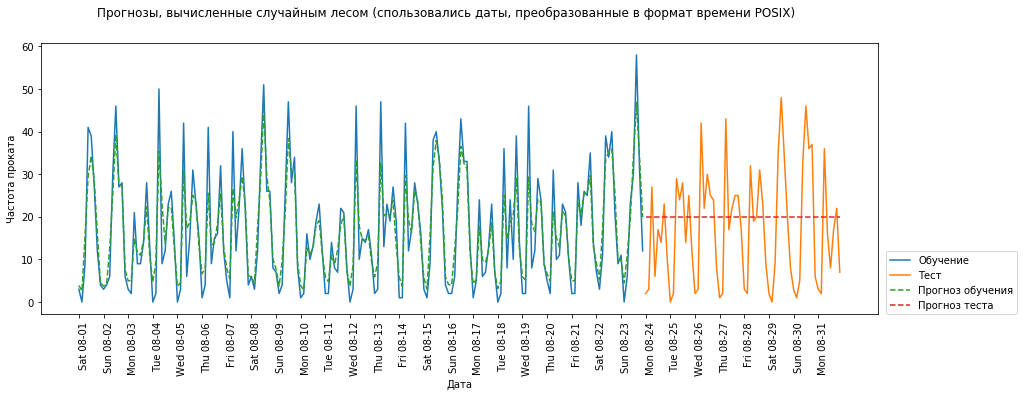

In [248]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
txt = 'Прогнозы, вычисленные случайным лесом (спользовались даты, преобразованные в формат времени POSIX)'
#plt.figure()
eval_on_features(X, y, regressor, txt)

Как это обычно бывает при построении случайного леса, правильность прогнозов на обучающем наборе получилась довольно высокой. Однако для тестового набора прогнозирется ровная линия. Что произошло?<br/>
Проблема обусловлена сочетанием типа нашего признака и используемого метода. Значения признака на основе POSIX-времени для тестового набора находятся вне диапазона значений этого признака в обучающей выборке: точки тестового набора в отличие от точек обучающего набора имеют более поздние временные метки. Случайный лес не может экстраполировать значения признаков. Итог модель предсказывает значения зависимой переменной для ближайшей точки обучающего набора.

R^2 для тестового набора данных: 0.60


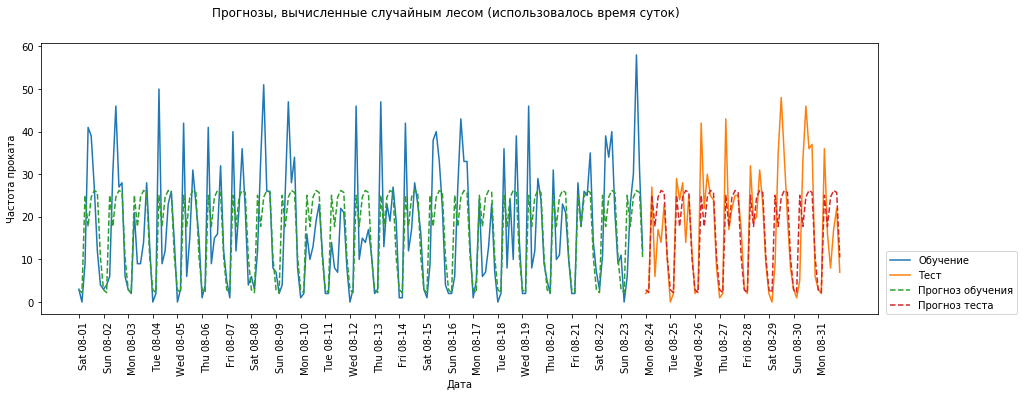

In [249]:
# попробуем теперь время суток
txt = 'Прогнозы, вычисленные случайным лесом (использовалось время суток)'
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor, txt)

R^2 для тестового набора данных: 0.84


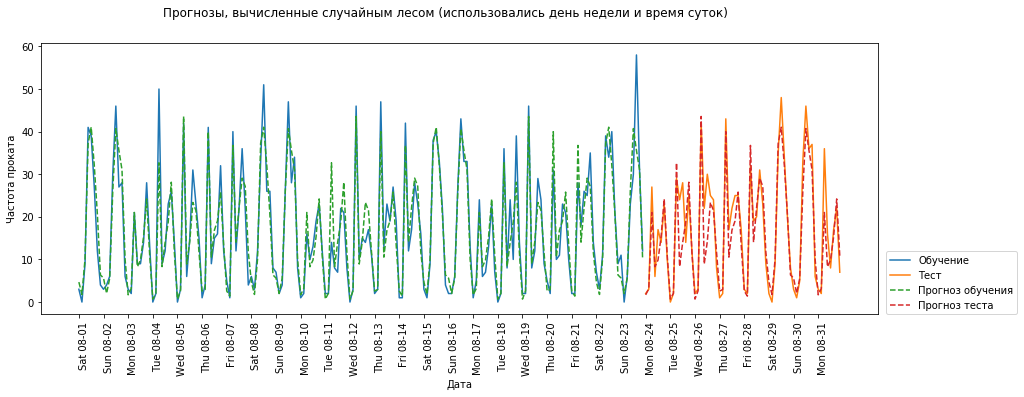

In [250]:
# R2 стало лучше , но прогнозы явно не учитывают эффект, обусловленный днем недели.
txt = 'Прогнозы, вычисленные случайным лесом (использовались день недели и время суток)'
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                         citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor, txt)

R^2 для тестового набора данных: 0.13


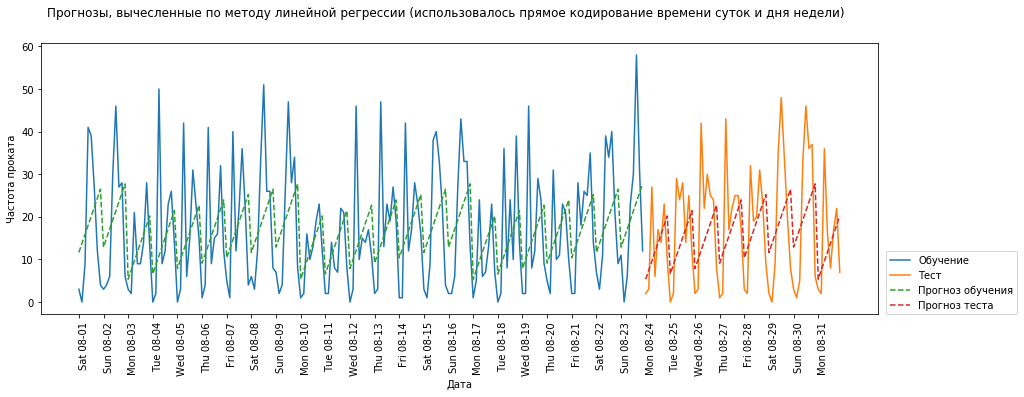

In [251]:
# попробуем применить линейную регрессию
txt = 'Прогнозы, вычесленные по методу линейной регрессии (использовалось прямое кодирование времени суток и дня недели)'
eval_on_features(X_hour_week, y, LinearRegression(), txt)

R^2 для тестового набора данных: 0.62


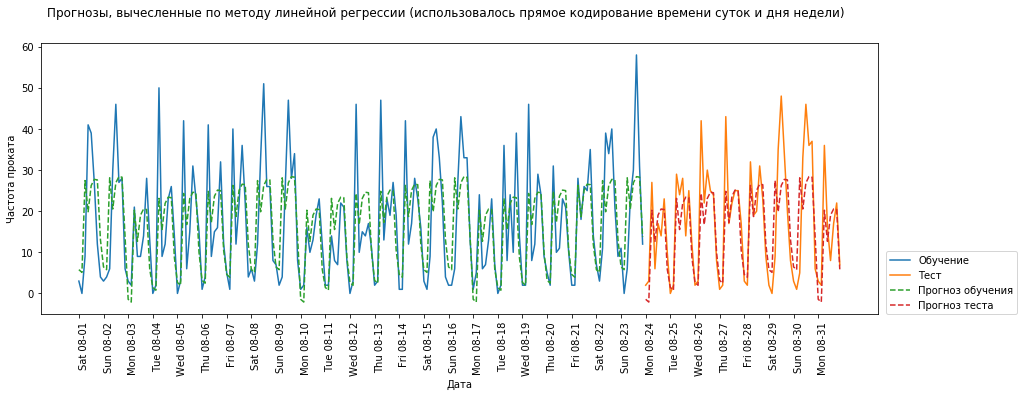

In [252]:
# линейная регрессия показала хуже результат, а переодическая структура данных выглядит страно
# причиной этого является тот факт, что мы закодировали день недели и время суток с помощью
# целочисленных значений, а здесь эти характеристики интерпретируются как непрерывные переменные.
enc = OneHotEncoder(categories='auto')
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge(), txt)

Данное значение намного лучше, теперь модель вычисляет один коэффициент для каждого дня недели и один коэффициент для каждого времени суток. Используя взаимодействия можем вычислить коэффициент для каждой комбинации дня недели и времени суток.

R^2 для тестового набора данных: 0.85


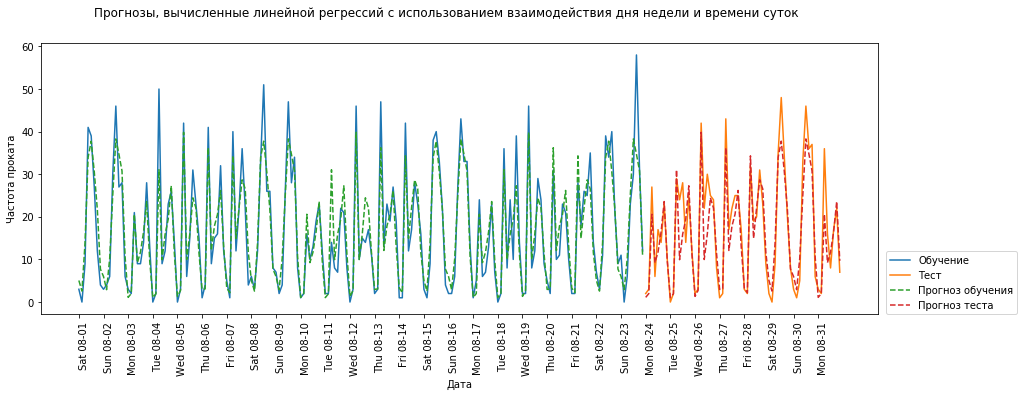

In [258]:
txt = 'Прогнозы, вычисленные линейной регрессий с использованием взаимодействия дня недели и времени суток'
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr, txt)

Модель такой же прогностической силой, что и случайные лес. Большим плюсом является понятность: мы вычисляем по одному коэф. для каждой комбинации дня недели и времени суток и можем без затруднения построить график коэффициентов, вычисленных с помощью модели, что было бы невозможным для случайного леса.

In [260]:
# создадим имена для признаков
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [268]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

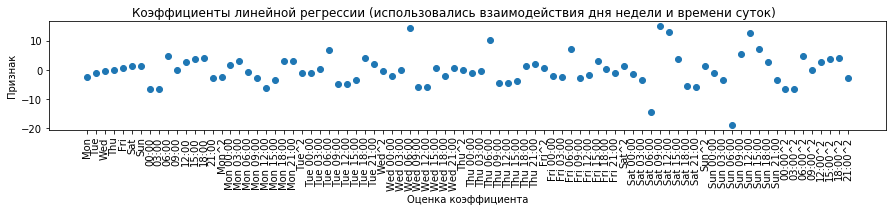

In [277]:
# теперь можно визуализировать коэф извлеченные из линейной модели
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('Оценка коэффициента')
plt.ylabel('Признак')
plt.suptitle('Коэффициенты линейной регрессии (использовались взаимодействия дня недели и времени суток)')
plt.show()